# Credit Card Fraud Detection using python

Information about data set

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import LocalOutlierFactor

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

## Finding and Removing the outliers

In [4]:
# sampling random 50000 points
data_50000 = data.sample(n = 50000)

In [5]:
data_50000.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
134840,80990.0,-2.444260,2.585654,0.268899,0.988650,-0.602195,-0.565556,0.112191,0.332103,0.591638,...,-0.160517,-0.429796,-0.008273,0.264212,-0.185336,-0.662864,-1.583215,-0.548640,9.55,0
60107,49162.0,-0.600425,0.507376,1.315834,0.477573,-0.978872,0.044558,0.110615,0.559529,-0.057982,...,0.126634,0.402120,0.173389,0.600582,-0.232857,0.280839,-0.096289,-0.026369,93.43,0
171094,120496.0,1.937401,-0.628340,-0.769127,0.289363,-0.285919,0.237501,-0.628537,0.087615,1.560418,...,0.165889,0.564984,0.021425,0.048119,-0.010319,-0.207181,0.023493,-0.028608,61.75,0
6965,9051.0,-0.692043,0.628297,1.755697,1.426988,0.507462,0.875312,0.303436,0.335085,0.681058,...,-0.055277,0.154263,-0.068650,-0.364108,-0.015503,-0.215139,0.109646,0.095162,46.92,0
21750,31838.0,-3.269965,-3.058706,3.690959,4.087592,2.304401,1.248519,-3.111997,1.455856,0.590570,...,0.525970,1.174842,0.599197,-0.595380,0.035730,0.660886,0.352391,0.223467,76.44,0


In [6]:
data_50000.to_csv("NewCreditCard.csv")

# Detecting outliers for 'k' value 2

### We have assumed that 50% of total points in our data set are outliers.¶

In [7]:
newData = pd.read_csv("NewCreditCard.csv")

In [8]:
newData.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,134840,80990.0,-2.444260,2.585654,0.268899,0.988650,-0.602195,-0.565556,0.112191,0.332103,...,-0.160517,-0.429796,-0.008273,0.264212,-0.185336,-0.662864,-1.583215,-0.548640,9.55,0
1,60107,49162.0,-0.600425,0.507376,1.315834,0.477573,-0.978872,0.044558,0.110615,0.559529,...,0.126634,0.402120,0.173389,0.600582,-0.232857,0.280839,-0.096289,-0.026369,93.43,0
2,171094,120496.0,1.937401,-0.628340,-0.769127,0.289363,-0.285919,0.237501,-0.628537,0.087615,...,0.165889,0.564984,0.021425,0.048119,-0.010319,-0.207181,0.023493,-0.028608,61.75,0
3,6965,9051.0,-0.692043,0.628297,1.755697,1.426988,0.507462,0.875312,0.303436,0.335085,...,-0.055277,0.154263,-0.068650,-0.364108,-0.015503,-0.215139,0.109646,0.095162,46.92,0
4,21750,31838.0,-3.269965,-3.058706,3.690959,4.087592,2.304401,1.248519,-3.111997,1.455856,...,0.525970,1.174842,0.599197,-0.595380,0.035730,0.660886,0.352391,0.223467,76.44,0


In [9]:
FinalData = newData.drop("Unnamed: 0", axis = 1)

In [10]:
FinalData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,80990.0,-2.444260,2.585654,0.268899,0.988650,-0.602195,-0.565556,0.112191,0.332103,0.591638,...,-0.160517,-0.429796,-0.008273,0.264212,-0.185336,-0.662864,-1.583215,-0.548640,9.55,0
1,49162.0,-0.600425,0.507376,1.315834,0.477573,-0.978872,0.044558,0.110615,0.559529,-0.057982,...,0.126634,0.402120,0.173389,0.600582,-0.232857,0.280839,-0.096289,-0.026369,93.43,0
2,120496.0,1.937401,-0.628340,-0.769127,0.289363,-0.285919,0.237501,-0.628537,0.087615,1.560418,...,0.165889,0.564984,0.021425,0.048119,-0.010319,-0.207181,0.023493,-0.028608,61.75,0
3,9051.0,-0.692043,0.628297,1.755697,1.426988,0.507462,0.875312,0.303436,0.335085,0.681058,...,-0.055277,0.154263,-0.068650,-0.364108,-0.015503,-0.215139,0.109646,0.095162,46.92,0
4,31838.0,-3.269965,-3.058706,3.690959,4.087592,2.304401,1.248519,-3.111997,1.455856,0.590570,...,0.525970,1.174842,0.599197,-0.595380,0.035730,0.660886,0.352391,0.223467,76.44,0


In [11]:
FinalData.shape

(50000, 31)

In [12]:
lof = LocalOutlierFactor(n_neighbors=2, algorithm='auto', metric='minkowski', p=2, metric_params=None, contamination=0.5, n_jobs=1)

outlierArray = lof.fit_predict(FinalData)

outlierArray

array([-1,  1, -1, ...,  1, -1, -1])

In [13]:
len(outlierArray)

50000

## Calculating total number of outlier and inliers

In [14]:
countOutliers = 0
countInliers = 0
for i in range(50000):
    if outlierArray[i] == -1:
        countOutliers += 1
    else:
        countInliers += 1
print("Total number of outliers = "+str(countOutliers))
print("Total number of inliers = "+str(countInliers))

Total number of outliers = 25000
Total number of inliers = 25000


In [15]:
FinalData2 = FinalData.copy()

In [16]:
FinalData2.shape

(50000, 31)

## Removing Outliers

In [17]:
for i in range(50000):
    if outlierArray[i] == -2:
        FinalData.drop(i, inplace = True)
FinalData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,80990.0,-2.444260,2.585654,0.268899,0.988650,-0.602195,-0.565556,0.112191,0.332103,0.591638,...,-0.160517,-0.429796,-0.008273,0.264212,-0.185336,-0.662864,-1.583215,-0.548640,9.55,0
1,49162.0,-0.600425,0.507376,1.315834,0.477573,-0.978872,0.044558,0.110615,0.559529,-0.057982,...,0.126634,0.402120,0.173389,0.600582,-0.232857,0.280839,-0.096289,-0.026369,93.43,0
2,120496.0,1.937401,-0.628340,-0.769127,0.289363,-0.285919,0.237501,-0.628537,0.087615,1.560418,...,0.165889,0.564984,0.021425,0.048119,-0.010319,-0.207181,0.023493,-0.028608,61.75,0
3,9051.0,-0.692043,0.628297,1.755697,1.426988,0.507462,0.875312,0.303436,0.335085,0.681058,...,-0.055277,0.154263,-0.068650,-0.364108,-0.015503,-0.215139,0.109646,0.095162,46.92,0
4,31838.0,-3.269965,-3.058706,3.690959,4.087592,2.304401,1.248519,-3.111997,1.455856,0.590570,...,0.525970,1.174842,0.599197,-0.595380,0.035730,0.660886,0.352391,0.223467,76.44,0


In [18]:
FinalData.shape

(50000, 31)

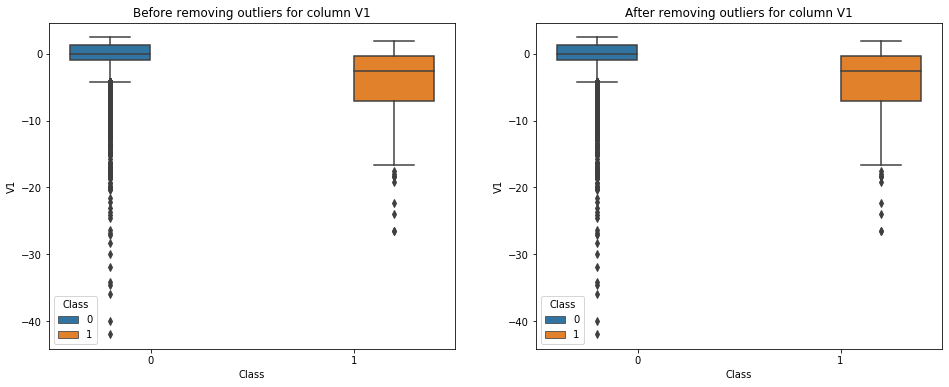

In [19]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V1")
ax = sns.boxplot(x="Class", y = "V1", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V1")
ax = sns.boxplot(x="Class", y = "V1", data= FinalData, hue = "Class")


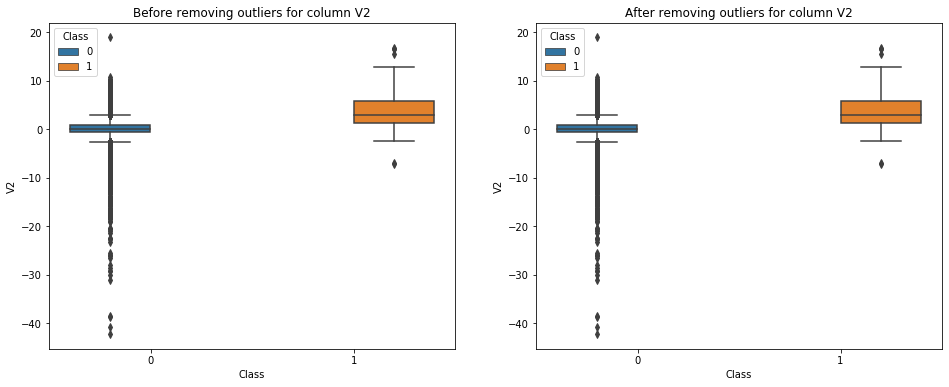

In [20]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V2")
ax = sns.boxplot(x="Class", y = "V2", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V2")
ax = sns.boxplot(x="Class", y = "V2", data= FinalData, hue = "Class")

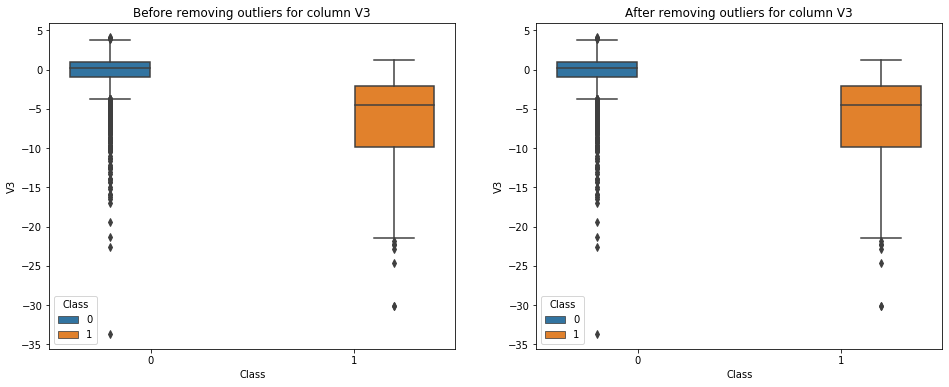

In [21]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V3")
ax = sns.boxplot(x="Class", y = "V3", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V3")
ax = sns.boxplot(x="Class", y = "V3", data= FinalData, hue = "Class")

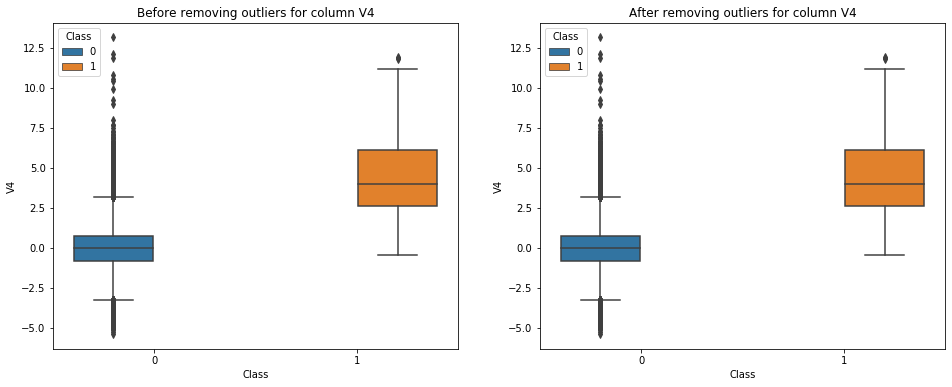

In [22]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V4")
ax = sns.boxplot(x="Class", y = "V4", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V4")
ax = sns.boxplot(x="Class", y = "V4", data= FinalData, hue = "Class")

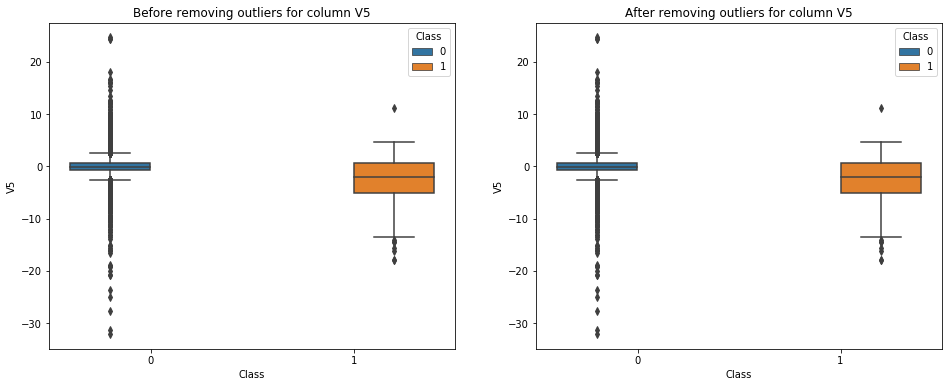

In [23]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V5")
ax = sns.boxplot(x="Class", y = "V5", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V5")
ax = sns.boxplot(x="Class", y = "V5", data= FinalData, hue = "Class")

It can easily be observed in all of the above boxplots corresponding to columns V1, V2, V3, V4, V5, that most of the outliers for points belongs to class 1 has been removed. Furthermore, many of the outliers for points belong to class 0 has also been removed. For example for class 0 in plot 1 for column V1 all of the outliers less than -35 have been removed. Similarly, for class 0 in plot 3 for column V3 all the outliers less than -18 have been removed. Similarly, for class 0 in plot 5 for column V5 all of the outliers greater than 15 have been removed.


## Detecting outliers for 'k' value 3

We have assumed that 50% of total points in our data set are outliers.

In [24]:
newData = pd.read_csv("NewCreditCard.csv")

newData.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,134840,80990.0,-2.444260,2.585654,0.268899,0.988650,-0.602195,-0.565556,0.112191,0.332103,...,-0.160517,-0.429796,-0.008273,0.264212,-0.185336,-0.662864,-1.583215,-0.548640,9.55,0
1,60107,49162.0,-0.600425,0.507376,1.315834,0.477573,-0.978872,0.044558,0.110615,0.559529,...,0.126634,0.402120,0.173389,0.600582,-0.232857,0.280839,-0.096289,-0.026369,93.43,0
2,171094,120496.0,1.937401,-0.628340,-0.769127,0.289363,-0.285919,0.237501,-0.628537,0.087615,...,0.165889,0.564984,0.021425,0.048119,-0.010319,-0.207181,0.023493,-0.028608,61.75,0
3,6965,9051.0,-0.692043,0.628297,1.755697,1.426988,0.507462,0.875312,0.303436,0.335085,...,-0.055277,0.154263,-0.068650,-0.364108,-0.015503,-0.215139,0.109646,0.095162,46.92,0
4,21750,31838.0,-3.269965,-3.058706,3.690959,4.087592,2.304401,1.248519,-3.111997,1.455856,...,0.525970,1.174842,0.599197,-0.595380,0.035730,0.660886,0.352391,0.223467,76.44,0


In [25]:
FinalData = newData.drop("Unnamed: 0", axis = 1)

FinalData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,80990.0,-2.444260,2.585654,0.268899,0.988650,-0.602195,-0.565556,0.112191,0.332103,0.591638,...,-0.160517,-0.429796,-0.008273,0.264212,-0.185336,-0.662864,-1.583215,-0.548640,9.55,0
1,49162.0,-0.600425,0.507376,1.315834,0.477573,-0.978872,0.044558,0.110615,0.559529,-0.057982,...,0.126634,0.402120,0.173389,0.600582,-0.232857,0.280839,-0.096289,-0.026369,93.43,0
2,120496.0,1.937401,-0.628340,-0.769127,0.289363,-0.285919,0.237501,-0.628537,0.087615,1.560418,...,0.165889,0.564984,0.021425,0.048119,-0.010319,-0.207181,0.023493,-0.028608,61.75,0
3,9051.0,-0.692043,0.628297,1.755697,1.426988,0.507462,0.875312,0.303436,0.335085,0.681058,...,-0.055277,0.154263,-0.068650,-0.364108,-0.015503,-0.215139,0.109646,0.095162,46.92,0
4,31838.0,-3.269965,-3.058706,3.690959,4.087592,2.304401,1.248519,-3.111997,1.455856,0.590570,...,0.525970,1.174842,0.599197,-0.595380,0.035730,0.660886,0.352391,0.223467,76.44,0


In [26]:
FinalData.shape

(50000, 31)

In [27]:
lof = LocalOutlierFactor(n_neighbors=3, algorithm='auto', metric='minkowski', p=2, metric_params=None, contamination=0.5, n_jobs=1)

outlierArray = lof.fit_predict(FinalData)

outlierArray

array([ 1,  1,  1, ..., -1, -1,  1])

In [28]:
len(outlierArray)

50000

### Calculating total number of outlier and inliers

In [29]:
countOutliers = 0
countInliers = 0
for i in range(50000):
    if outlierArray[i] == -1:
        countOutliers += 1
    else:
        countInliers += 1
print("Total number of outliers = "+str(countOutliers))
print("Total number of inliers = "+str(countInliers))

Total number of outliers = 25000
Total number of inliers = 25000


In [30]:
FinalData2 = FinalData.copy()

In [31]:
FinalData2.shape

(50000, 31)

### Removing Outliers

In [32]:
for i in range(50000):
    if outlierArray[i] == -2:
        FinalData.drop(i, inplace = True)
FinalData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,80990.0,-2.444260,2.585654,0.268899,0.988650,-0.602195,-0.565556,0.112191,0.332103,0.591638,...,-0.160517,-0.429796,-0.008273,0.264212,-0.185336,-0.662864,-1.583215,-0.548640,9.55,0
1,49162.0,-0.600425,0.507376,1.315834,0.477573,-0.978872,0.044558,0.110615,0.559529,-0.057982,...,0.126634,0.402120,0.173389,0.600582,-0.232857,0.280839,-0.096289,-0.026369,93.43,0
2,120496.0,1.937401,-0.628340,-0.769127,0.289363,-0.285919,0.237501,-0.628537,0.087615,1.560418,...,0.165889,0.564984,0.021425,0.048119,-0.010319,-0.207181,0.023493,-0.028608,61.75,0
3,9051.0,-0.692043,0.628297,1.755697,1.426988,0.507462,0.875312,0.303436,0.335085,0.681058,...,-0.055277,0.154263,-0.068650,-0.364108,-0.015503,-0.215139,0.109646,0.095162,46.92,0
4,31838.0,-3.269965,-3.058706,3.690959,4.087592,2.304401,1.248519,-3.111997,1.455856,0.590570,...,0.525970,1.174842,0.599197,-0.595380,0.035730,0.660886,0.352391,0.223467,76.44,0


In [33]:
FinalData2.shape

(50000, 31)

In [34]:
FinalData.shape

(50000, 31)

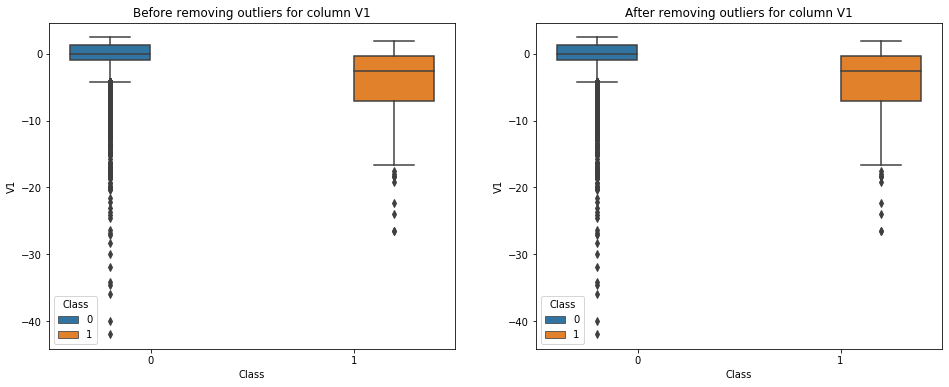

In [35]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V1")
ax = sns.boxplot(x="Class", y = "V1", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V1")
ax = sns.boxplot(x="Class", y = "V1", data= FinalData, hue = "Class")

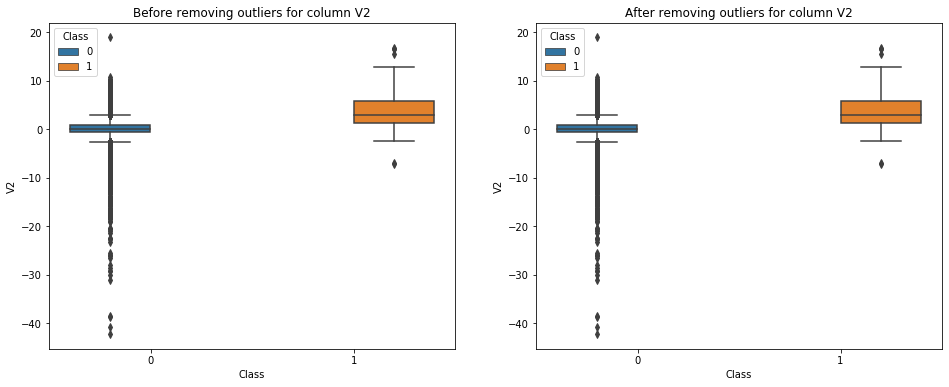

In [36]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V2")
ax = sns.boxplot(x="Class", y = "V2", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V2")
ax = sns.boxplot(x="Class", y = "V2", data= FinalData, hue = "Class")

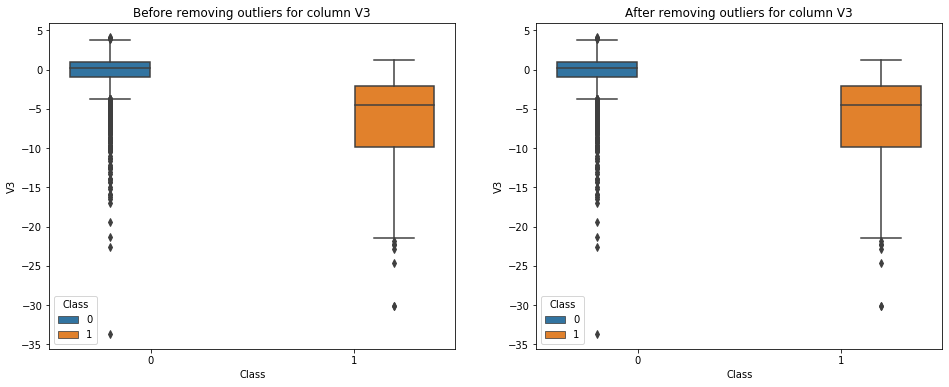

In [37]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V3")
ax = sns.boxplot(x="Class", y = "V3", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V3")
ax = sns.boxplot(x="Class", y = "V3", data= FinalData, hue = "Class")

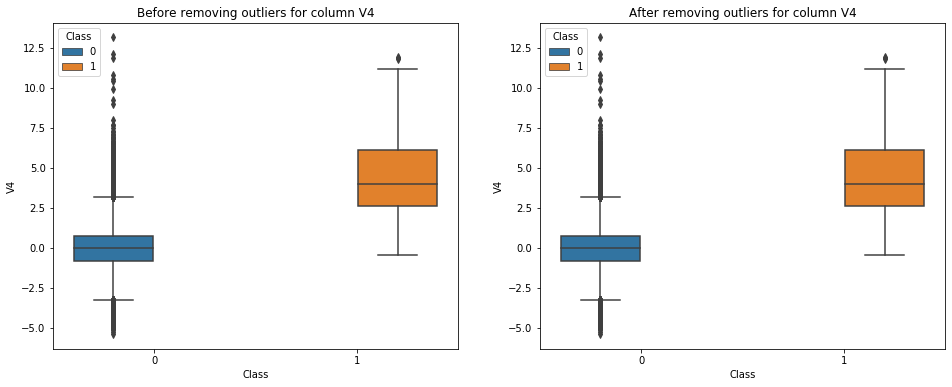

In [38]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V4")
ax = sns.boxplot(x="Class", y = "V4", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V4")
ax = sns.boxplot(x="Class", y = "V4", data= FinalData, hue = "Class")

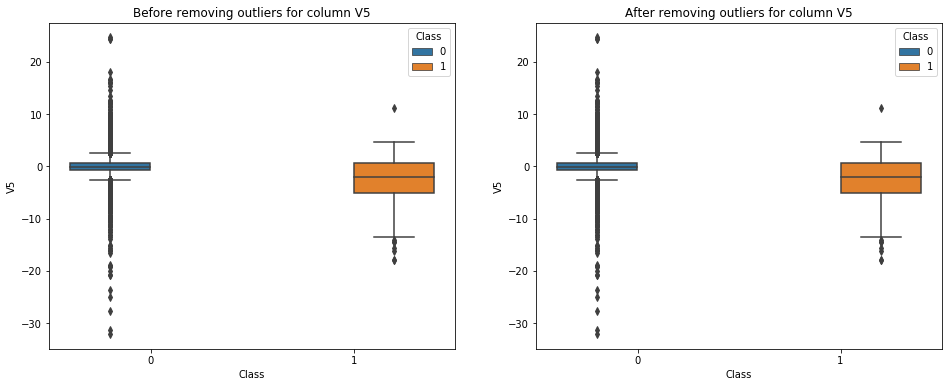

In [39]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V5")
ax = sns.boxplot(x="Class", y = "V5", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V5")
ax = sns.boxplot(x="Class", y = "V5", data= FinalData, hue = "Class")

It can easily be observed in all of the above boxplots corresponding to columns V1, V2, V3, V4, V5, that most of the outliers for points belongs to class 1 has been removed. Furthermore, many of the outliers for points belong to class 0 has also been removed. For example for class 0 in plot 1 for column V1 all of the outliers less than -35 have been removed. Similarly, for class 0 in plot 3 for column V3 all the outliers less than -18 have been removed. Similarly, for class 0 in plot 5 for column V5 all of the outliers greater than 15 have been removed.

## Detecting outliers for 'k' value 5
We have assumed that 50% of total points in our data set are outliers.

In [40]:
newData = pd.read_csv("NewCreditCard.csv")

newData.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,134840,80990.0,-2.444260,2.585654,0.268899,0.988650,-0.602195,-0.565556,0.112191,0.332103,...,-0.160517,-0.429796,-0.008273,0.264212,-0.185336,-0.662864,-1.583215,-0.548640,9.55,0
1,60107,49162.0,-0.600425,0.507376,1.315834,0.477573,-0.978872,0.044558,0.110615,0.559529,...,0.126634,0.402120,0.173389,0.600582,-0.232857,0.280839,-0.096289,-0.026369,93.43,0
2,171094,120496.0,1.937401,-0.628340,-0.769127,0.289363,-0.285919,0.237501,-0.628537,0.087615,...,0.165889,0.564984,0.021425,0.048119,-0.010319,-0.207181,0.023493,-0.028608,61.75,0
3,6965,9051.0,-0.692043,0.628297,1.755697,1.426988,0.507462,0.875312,0.303436,0.335085,...,-0.055277,0.154263,-0.068650,-0.364108,-0.015503,-0.215139,0.109646,0.095162,46.92,0
4,21750,31838.0,-3.269965,-3.058706,3.690959,4.087592,2.304401,1.248519,-3.111997,1.455856,...,0.525970,1.174842,0.599197,-0.595380,0.035730,0.660886,0.352391,0.223467,76.44,0


In [41]:
FinalData = newData.drop("Unnamed: 0", axis = 1)

FinalData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,80990.0,-2.444260,2.585654,0.268899,0.988650,-0.602195,-0.565556,0.112191,0.332103,0.591638,...,-0.160517,-0.429796,-0.008273,0.264212,-0.185336,-0.662864,-1.583215,-0.548640,9.55,0
1,49162.0,-0.600425,0.507376,1.315834,0.477573,-0.978872,0.044558,0.110615,0.559529,-0.057982,...,0.126634,0.402120,0.173389,0.600582,-0.232857,0.280839,-0.096289,-0.026369,93.43,0
2,120496.0,1.937401,-0.628340,-0.769127,0.289363,-0.285919,0.237501,-0.628537,0.087615,1.560418,...,0.165889,0.564984,0.021425,0.048119,-0.010319,-0.207181,0.023493,-0.028608,61.75,0
3,9051.0,-0.692043,0.628297,1.755697,1.426988,0.507462,0.875312,0.303436,0.335085,0.681058,...,-0.055277,0.154263,-0.068650,-0.364108,-0.015503,-0.215139,0.109646,0.095162,46.92,0
4,31838.0,-3.269965,-3.058706,3.690959,4.087592,2.304401,1.248519,-3.111997,1.455856,0.590570,...,0.525970,1.174842,0.599197,-0.595380,0.035730,0.660886,0.352391,0.223467,76.44,0


In [42]:
FinalData.shape

(50000, 31)

In [43]:
lof = LocalOutlierFactor(n_neighbors=5, algorithm='auto', metric='minkowski', p=2, metric_params=None, contamination=0.5, n_jobs=1)

outlierArray = lof.fit_predict(FinalData)

outlierArray

array([ 1,  1,  1, ...,  1, -1,  1])

#### Here, we got an array, where row corresponding to array element 1 in our dataset is an inlier and row corresponding to array element to -1 in our dataset is an oulier

In [44]:
len(outlierArray)

50000

### Calculating total number of outlier and inliers

In [45]:
countOutliers = 0
countInliers = 0
for i in range(50000):
    if outlierArray[i] == -1:
        countOutliers += 1
    else:
        countInliers += 1
print("Total number of outliers = "+str(countOutliers))
print("Total number of inliers = "+str(countInliers))

Total number of outliers = 25000
Total number of inliers = 25000


In [46]:
FinalData2 = FinalData.copy()

In [47]:
FinalData2.shape

(50000, 31)

### Removing Outliers

In [48]:
for i in range(50000):
    if outlierArray[i] == -2:
        FinalData.drop(i, inplace = True)
FinalData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,80990.0,-2.444260,2.585654,0.268899,0.988650,-0.602195,-0.565556,0.112191,0.332103,0.591638,...,-0.160517,-0.429796,-0.008273,0.264212,-0.185336,-0.662864,-1.583215,-0.548640,9.55,0
1,49162.0,-0.600425,0.507376,1.315834,0.477573,-0.978872,0.044558,0.110615,0.559529,-0.057982,...,0.126634,0.402120,0.173389,0.600582,-0.232857,0.280839,-0.096289,-0.026369,93.43,0
2,120496.0,1.937401,-0.628340,-0.769127,0.289363,-0.285919,0.237501,-0.628537,0.087615,1.560418,...,0.165889,0.564984,0.021425,0.048119,-0.010319,-0.207181,0.023493,-0.028608,61.75,0
3,9051.0,-0.692043,0.628297,1.755697,1.426988,0.507462,0.875312,0.303436,0.335085,0.681058,...,-0.055277,0.154263,-0.068650,-0.364108,-0.015503,-0.215139,0.109646,0.095162,46.92,0
4,31838.0,-3.269965,-3.058706,3.690959,4.087592,2.304401,1.248519,-3.111997,1.455856,0.590570,...,0.525970,1.174842,0.599197,-0.595380,0.035730,0.660886,0.352391,0.223467,76.44,0


In [49]:
FinalData2.shape

(50000, 31)

In [50]:
FinalData.shape

(50000, 31)

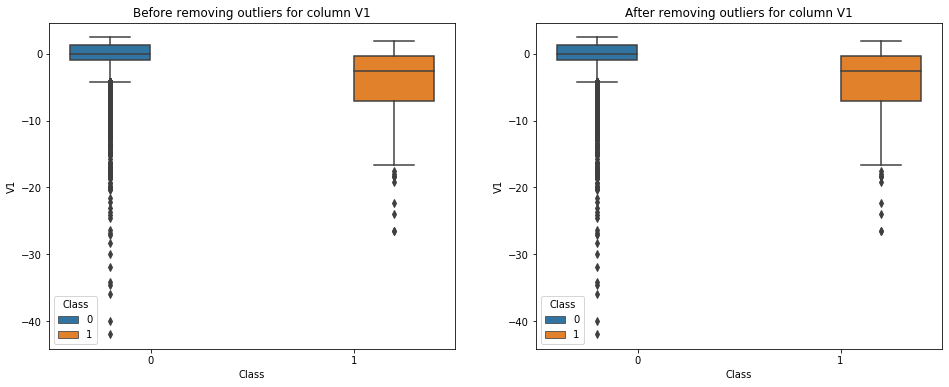

In [51]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V1")
ax = sns.boxplot(x="Class", y = "V1", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V1")
ax = sns.boxplot(x="Class", y = "V1", data= FinalData, hue = "Class")

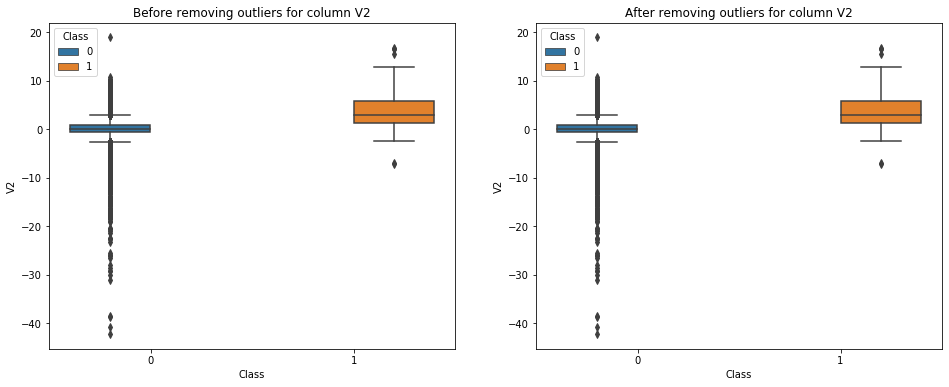

In [52]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V2")
ax = sns.boxplot(x="Class", y = "V2", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V2")
ax = sns.boxplot(x="Class", y = "V2", data= FinalData, hue = "Class")

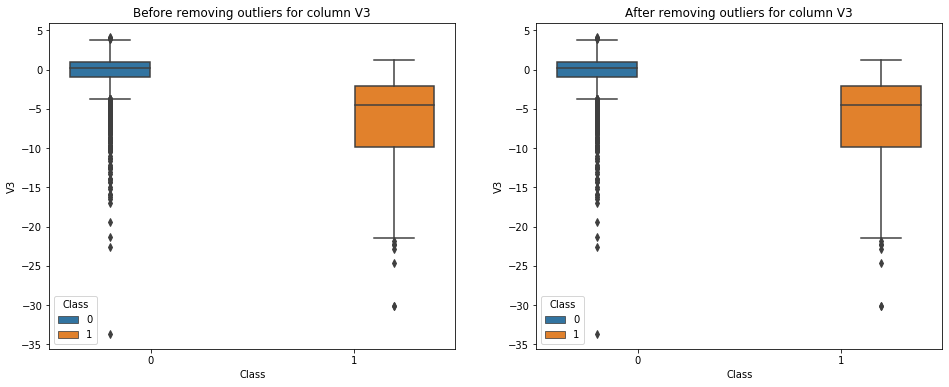

In [53]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V3")
ax = sns.boxplot(x="Class", y = "V3", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V3")
ax = sns.boxplot(x="Class", y = "V3", data= FinalData, hue = "Class")

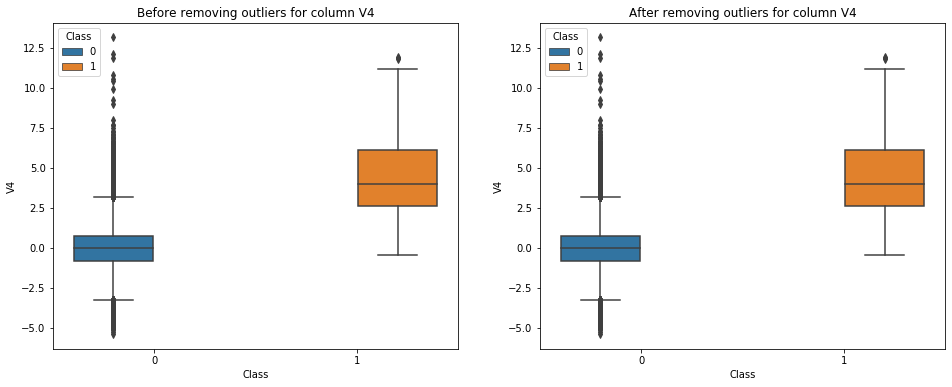

In [54]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V4")
ax = sns.boxplot(x="Class", y = "V4", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V4")
ax = sns.boxplot(x="Class", y = "V4", data= FinalData, hue = "Class")

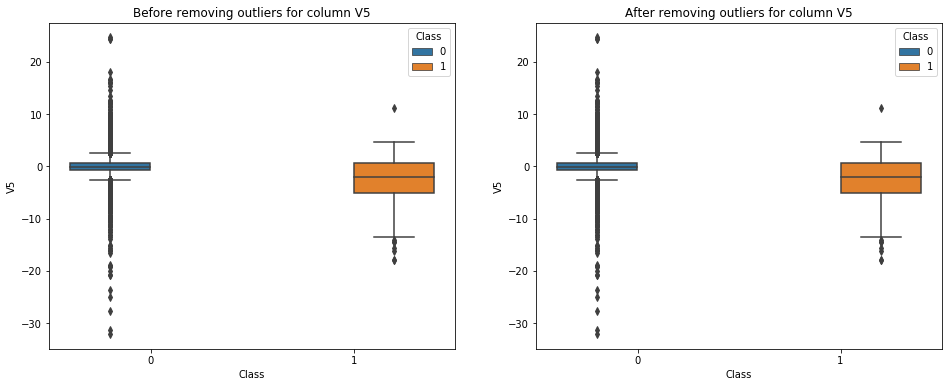

In [55]:
fig = plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title("Before removing outliers for column V5")
ax = sns.boxplot(x="Class", y = "V5", data= FinalData2, hue = "Class")

plt.subplot(1, 2, 2)
plt.title("After removing outliers for column V5")
ax = sns.boxplot(x="Class", y = "V5", data= FinalData, hue = "Class")

 It can easily be observed in all of the above boxplots corresponding to columns V1, V2, V3, V4, V5, that most of the outliers for points belongs to class 1 has been removed. Furthermore, many of the outliers for points belong to class 0 has also been removed. For example for class 0 in plot 1 for column V1 all of the outliers less than -17 have been removed. Similarly, for class 0 in plot 3 for column V3 all the outliers less than -15 have been removed. Similarly, for class 0 in plot 5 for column V5 all of the outliers greater than 8.5 have been removed.

 In conclusion, for k = 5 more outliers have been removed as compared to k = 2 or 3. Therefore, k = 5 is the best value for number of neighbors.

# Linear Algebra (Credit card fraud detection)

In [56]:
Creditcard = pd.read_csv("CreditCard.csv")
Creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [57]:
Creditcard.shape

(284807, 31)

In [58]:
Creditcard.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [59]:
Creditcard["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# 2-D Scatter Plot

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


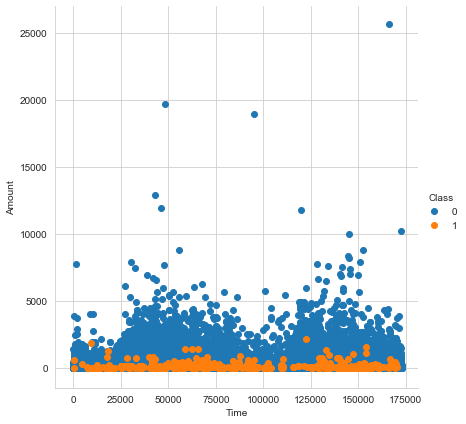

In [60]:
sns.set_style("whitegrid")
sns.FacetGrid(Creditcard, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

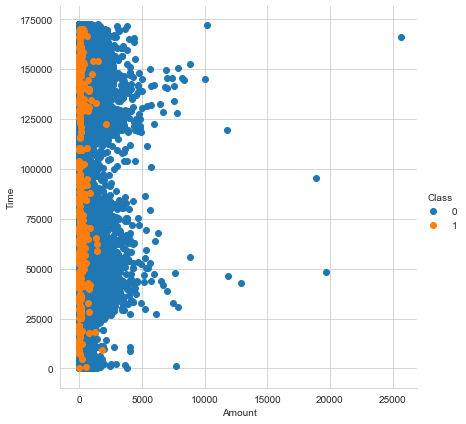

In [61]:
sns.set_style("whitegrid")
sns.FacetGrid(Creditcard, hue="Class", size = 6).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()

# 3D Scatter plot

In [62]:
FilteredData = Creditcard[['Time','Amount', 'Class']]

In [63]:
FilteredData

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
...,...,...,...
284802,172786.0,0.77,0
284803,172787.0,24.79,0
284804,172788.0,67.88,0
284805,172788.0,10.00,0


In [64]:
print(FilteredData.shape)

(284807, 3)


In [65]:

FilteredData["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


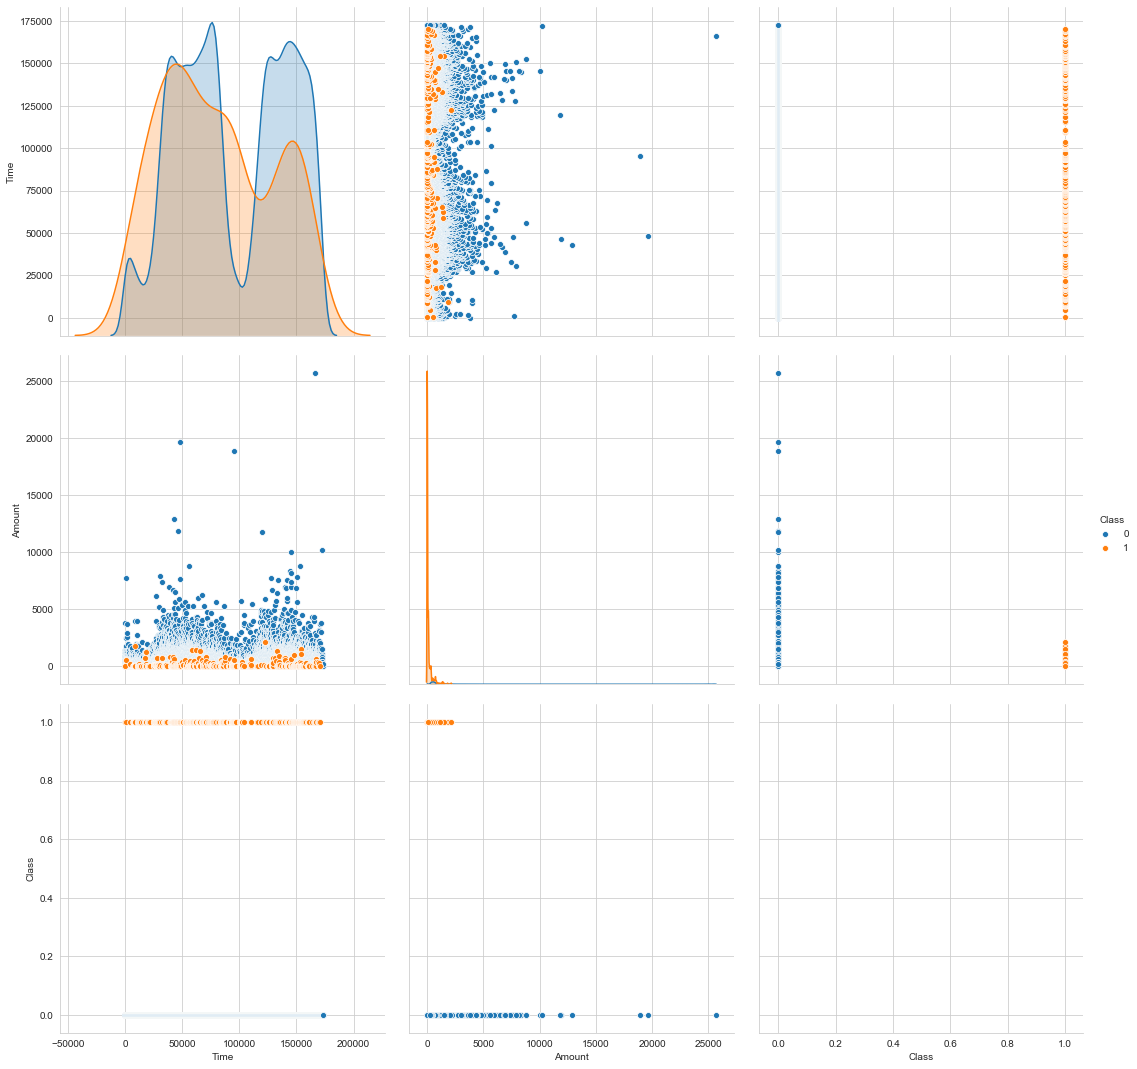

In [66]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(FilteredData, hue="Class", size=5);
plt.show()

In [67]:
countLess = 0
countMore= 0
for i in range(284806):
    if(FilteredData.iloc[i]["Amount"] < 2500):
        countLess = countLess + 1
    else:
        countMore = countMore + 1
print(countLess)
print(countMore)

284357
449


In [68]:
percentage = (countLess/284807)*100
percentage

99.84199826549207

Observations:

Now it has been calculated that there are 284357 transactions which has a transaction amount less than 2500. Means 99.84% of transactions have transaction amount less than 2500

In [69]:
class0 = 0
class1 = 0
for i in range(284806):
    if(FilteredData.iloc[i]["Amount"] < 2500):
        if(FilteredData.iloc[i]["Class"] == 0):
            class0 = class0 + 1
        else:
            class1 = class1 + 1
        
print(class0)
print(class1)

283865
492


In [70]:
FilteredData["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# Histogram, PDF and CDF

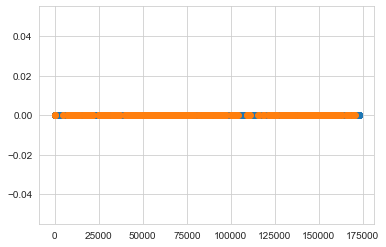

In [71]:
creditCard_genuine = FilteredData.loc[FilteredData["Class"] == 0]
creditCard_fraud = FilteredData.loc[FilteredData["Class"] == 1]

plt.plot(creditCard_genuine["Time"], np.zeros_like(creditCard_genuine["Time"]), "o")
plt.plot(creditCard_fraud["Time"], np.zeros_like(creditCard_fraud["Time"]), "o")

plt.show()

Observations:

Fraud and genuine transactions are spread evenly thought time and there is no clear distinction.

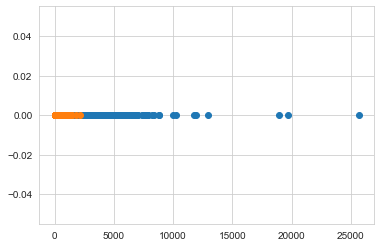

In [72]:
plt.plot(creditCard_genuine["Amount"], np.zeros_like(creditCard_genuine["Amount"]), "o")
plt.plot(creditCard_fraud["Amount"], np.zeros_like(creditCard_fraud["Amount"]), "o")

plt.show()
#X-axis: Amount

Observations:

It can clearly be observed from this 1D scatter plot that the fraud transactions are there only on the transaction amount less than 2500.

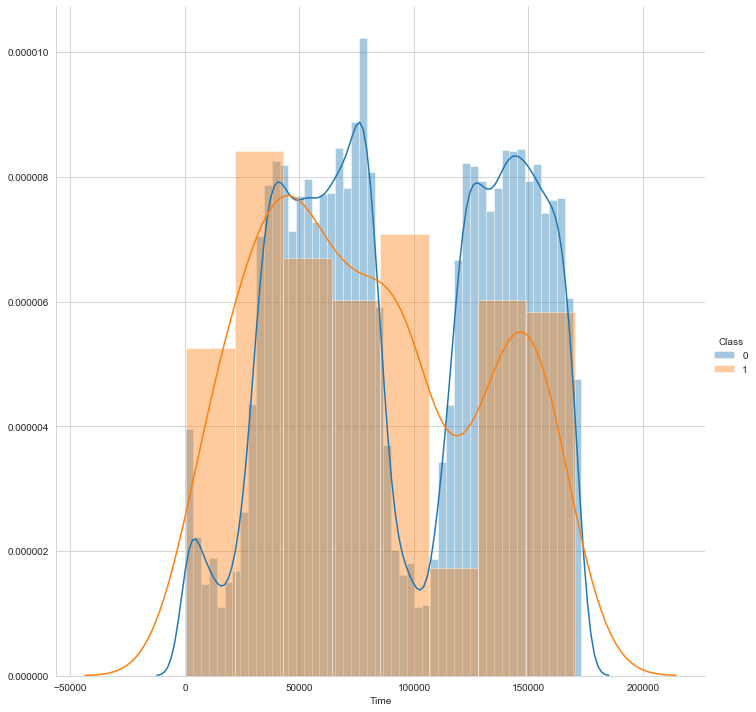

In [73]:
sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Time").add_legend()
plt.show()

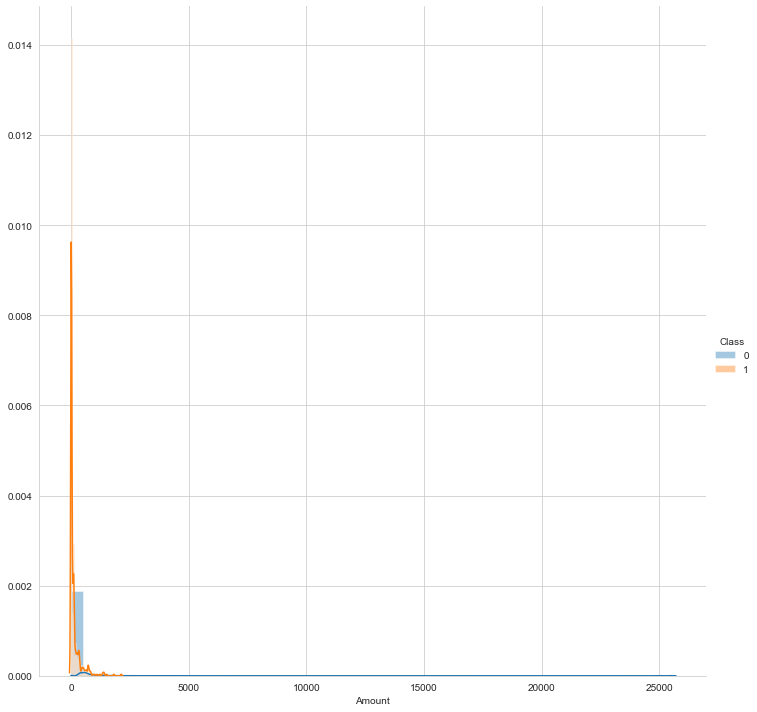

In [74]:
sns.FacetGrid(FilteredData, hue="Class", size=10).map(sns.distplot, "Amount").add_legend()
plt.show()

Observations:

Most of the transaction have amount less than 2500 approximately and all of the fraud transactions have transaction amount less than 2500. There is no fraud transaction of transaction amount greater than 2500.

Hence, this is the best histogram we have

pdf =  [9.98553406e-01 1.26401388e-03 1.26401388e-04 3.51114966e-05
 7.02229931e-06 3.51114966e-06 0.00000000e+00 7.02229931e-06
 0.00000000e+00 3.51114966e-06]


Counts = [3.88675874e-04 4.92003427e-07 4.92003427e-08 1.36667619e-08
 2.73335237e-09 1.36667619e-09 0.00000000e+00 2.73335237e-09
 0.00000000e+00 1.36667619e-09]


Bin edges =  [    0.     2569.116  5138.232  7707.348 10276.464 12845.58  15414.696
 17983.812 20552.928 23122.044 25691.16 ]


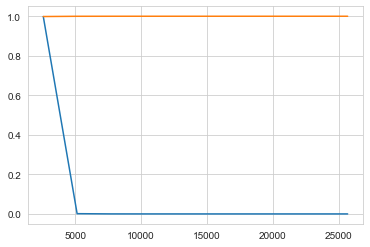

In [75]:
counts, bin_edges = np.histogram(FilteredData['Amount'], bins=10, density = True)
pdf = counts/(sum(counts))

print("pdf = ",pdf)
print("\n")
print("Counts =",counts)
print("\n")
print("Bin edges = ",bin_edges)

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

# Mean, Variance and Std-dev

In [76]:
print("Means:")
print("Mean of transaction amount of genuine transactions: ",np.mean(creditCard_genuine["Amount"]))
print("Mean of transaction amount of fraud transactions: ",np.mean(creditCard_fraud["Amount"]))

Means:
Mean of transaction amount of genuine transactions:  88.29102242225574
Mean of transaction amount of fraud transactions:  122.21132113821133


In [77]:
print("Standard Deviation:")
print("Std-Deviation of transaction amount of genuine transactions: ", np.std(creditCard_genuine["Amount"]))
print("Std-Deviation of transaction amount of fraud transactions: ", np.std(creditCard_fraud["Amount"]))

Standard Deviation:
Std-Deviation of transaction amount of genuine transactions:  250.1046523874637
Std-Deviation of transaction amount of fraud transactions:  256.42229861324483


In [78]:
print("Median:")
print("Median of transaction amount of genuine transactions: ", np.median(creditCard_genuine["Amount"]))
print("Median of transaction amount of fraud transactions: ", np.median(creditCard_fraud["Amount"]))

Median:
Median of transaction amount of genuine transactions:  22.0
Median of transaction amount of fraud transactions:  9.25


In [79]:
print("\nQuantiles:")
print(np.percentile(creditCard_genuine["Amount"],np.arange(0, 100, 25)))
print(np.percentile(creditCard_fraud["Amount"],np.arange(0, 100, 25)))


Quantiles:
[ 0.    5.65 22.   77.05]
[  0.     1.     9.25 105.89]


# Box plot and Whiskers

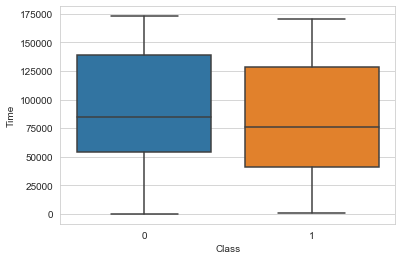

In [80]:
sns.boxplot(x = "Class", y = "Time", data = Creditcard)
plt.show()

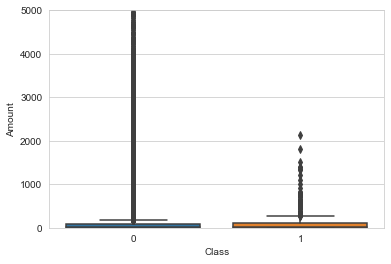

In [81]:
sns.boxplot(x = "Class", y = "Amount", data = Creditcard)
plt.ylim(0, 5000)
plt.show()

Observations:

From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 3000. All of the fraud transactions have transaction amount less than 3000. However, there are many transactions which have a transaction amount greater than 3000 and all of them are genuine.

In [82]:
from scipy import spatial

In [83]:
sampleData = Creditcard.head(20000) 

In [84]:
samples = Creditcard.loc[30401:30500] 

In [85]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [86]:
frame = []

In [ ]:
for i in range(30401, 30501):
    t1 = samples.loc[i]
    c = samples.loc[i]["Class"]
    for j in range(20000):
        t2 = sampleData.loc[j]
        classLabel = Creditcard.loc[j]["Class"]
        similarity = 1 - spatial.distance.cosine(t1, t2)
        frame.append([classLabel, similarity, j])
        
    df = pd.DataFrame(frame, columns=['Class', 'Similarity', 'Transaction ID'])
    df_sorted = df.sort_values("Similarity", ascending=False)
    print("Top 10 transactions having highest similarity with transaction ID = "+str(i)+" and class = "+str(c)+":")
    print(df_sorted.iloc[:10])
    print("\n")
    frame = []


Top 10 transactions having highest similarity with transaction ID = 30401 and class = 0.0:
       Class  Similarity  Transaction ID
16709    0.0         1.0           16709
18754    0.0         1.0           18754
15840    0.0         1.0           15840
16254    0.0         1.0           16254
18586    0.0         1.0           18586
16628    0.0         1.0           16628
18438    0.0         1.0           18438
18046    0.0         1.0           18046
15946    0.0         1.0           15946
14804    0.0         1.0           14804


Top 10 transactions having highest similarity with transaction ID = 30402 and class = 0.0:
       Class  Similarity  Transaction ID
19040    0.0         1.0           19040
16720    0.0         1.0           16720
18994    0.0         1.0           18994
19142    0.0         1.0           19142
15480    0.0         1.0           15480
17628    0.0         1.0           17628
17591    0.0         1.0           17591
17876    0.0         1.0           17